<a href="https://colab.research.google.com/github/Imppel-9704/condo-data-web-scraping-project/blob/master/condo_price_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (Exploratory Data Analysis)
For doing EDA I follow these 3 easy steps:
1. Reading and understanding the dataset
2. Data Cleaning
3. Visualization

## Reading and understanding the dataset

### Import necessary library, load, and preview data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_rental_condo_data_bkk_jan_2024.csv', encoding='utf-8')

In [3]:
df.head()

,name,address,province,district,agency,link,built_year,room_size,bedroom,bathroom,is_furnished,transportation,station_names,distance_from_station,price_per_sqm,rental_price
0,"The Saint Residences Ladprao, Bangkok","Vibhavadi-Rangsit Road, Jom Phon, Chatuchak, ...",Bangkok,Chatuchak,admin,https://www.ddproperty.com/en/property/the-sai...,2018.0,56,2,2,True,MRT,BL14 Phahon Yothin,180 m,464.29,26000
1,"Q Chidlom-Phetchaburi, Bangkok","1088 Phetchaburi Road, Makkasan, Ratchathewi, ...",Bangkok,Ratchathewi,Kitichanasin Realestate services,https://www.ddproperty.com/en/property/q-chidl...,2018.0,47,1,1,True,BTS,E1 Chit Lom,590 m,744.68,35000
2,"The Issara Ladprao, Bangkok","296 Ladpao Road, Jom Phon, Chatuchak, Bangkok",Bangkok,Chatuchak,admin,https://www.ddproperty.com/en/property/the-iss...,2009.0,86,2,2,True,MRT,BL15 Lat Phrao,630 m,465.12,40000
3,"Life Ladprao, Bangkok","992 Ladprao Road, Jom Phon, Chatuchak, Bangkok",Bangkok,Chatuchak,admin,https://www.ddproperty.com/en/property/life-la...,2020.0,29,1,1,True,BTS,N9 Ha Yaek Lat Phrao,160 m,500.00,14500
4,"Mazarine Ratchayothin, Bangkok","Soi Phahonyothin 30, Phahonyothin Road, Chan K...",Bangkok,Chatuchak,admin,https://www.ddproperty.com/en/property/mazarin...,2020.0,26,0,1,True,BTS,N11 Ratchayothin,50 m,615.38,16000


In [4]:
df.tail()

,name,address,province,district,agency,link,built_year,room_size,bedroom,bathroom,is_furnished,transportation,station_names,distance_from_station,price_per_sqm,rental_price
423,"Icon III, Bangkok","858 Sukhumvit Road, Khlong Tan Nua, Watthana, ...",Bangkok,Watthana,คัทยวรรณ หิรัญจิโรจน์,https://www.ddproperty.com/en/property/icon-ii...,2014.0,83,1,1,True,NaN,NaN,NaN,421.69,35000
424,"Ivy Ampio, Bangkok","48 Ratchadaphisek Road, Huai Khwang, Huai Khwa...",Bangkok,Huai Khwang,Chatuphon Mochida,https://www.ddproperty.com/en/property/ivy-amp...,2013.0,32,0,1,True,MRT,BL19 Thailand Cultural Centre,350 m,625.00,20000
425,"Belle Grand Rama 9, Bangkok","131 Rama 9 Road, Huai Khwang, Huai Khwang, Ban...",Bangkok,Huai Khwang,Chatuphon Mochida,https://www.ddproperty.com/en/property/belle-g...,2015.0,43,1,1,True,MRT,BL20 Phra Ram 9,540 m,581.40,25000
426,"IDEO Blucove Sukhumvit, Bangkok","2952 Sukhumvit Road, Bang Na, Bang Na, Bangkok",Bangkok,Bang Na,Chatuphon Mochida,https://www.ddproperty.com/en/property/ideo-bl...,2011.0,49,2,2,True,BTS,E12 Udom Suk,150 m,530.61,26000
427,"IDEO Mobi Asoke, Bangkok","New Petchaburi Road, Bang Kapi, Huai Khwang, B...",Bangkok,Huai Khwang,Chatuphon Mochida,https://www.ddproperty.com/en/property/ideo-mo...,2018.0,24,0,1,False,BTS,E4 Asok,270 m,833.33,20000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   428 non-null    object 
 1   address                428 non-null    object 
 2   province               428 non-null    object 
 3   district               426 non-null    object 
 4   agency                 428 non-null    object 
 5   link                   428 non-null    object 
 6   built_year             418 non-null    float64
 7   room_size              428 non-null    int64  
 8   bedroom                428 non-null    int64  
 9   bathroom               428 non-null    int64  
 10  is_furnished           428 non-null    bool   
 11  transportation         383 non-null    object 
 12  station_names          384 non-null    object 
 13  distance_from_station  384 non-null    object 
 14  price_per_sqm          428 non-null    float64
 15  rental

In [6]:
df.describe()

,built_year,room_size,bedroom,bathroom,price_per_sqm,rental_price
count,418.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,2015.346890,73.401869,1.567757,1.581776,680.672383,54675.467290
std,4.989846,69.170781,0.850726,0.895131,296.059424,72421.611865
min,1992.000000,21.000000,0.000000,1.000000,202.700000,7000.000000
25%,2012.000000,35.000000,1.000000,1.000000,464.912500,20000.000000
50%,2016.500000,50.000000,1.000000,1.000000,622.585000,30000.000000
75%,2019.000000,82.000000,2.000000,2.000000,819.517500,55000.000000
max,2023.000000,544.000000,5.000000,5.000000,1861.000000,600000.000000


## Cleaning and converting data type
From data previewing above I think columns "distance_from_station" can be used for analysis. So I remove whitespace and word "m" in dataset then convert data type to float

In [7]:
df['distance_from_station'] = df['distance_from_station'].str.strip(' m')
df['distance_from_station'] = df['distance_from_station'].astype('float64')

In [8]:
df.describe()

,built_year,room_size,bedroom,bathroom,distance_from_station,price_per_sqm,rental_price
count,418.000000,428.000000,428.000000,428.000000,384.000000,428.000000,428.000000
mean,2015.346890,73.401869,1.567757,1.581776,361.953125,680.672383,54675.467290
std,4.989846,69.170781,0.850726,0.895131,212.658389,296.059424,72421.611865
min,1992.000000,21.000000,0.000000,1.000000,10.000000,202.700000,7000.000000
25%,2012.000000,35.000000,1.000000,1.000000,200.000000,464.912500,20000.000000
50%,2016.500000,50.000000,1.000000,1.000000,330.000000,622.585000,30000.000000
75%,2019.000000,82.000000,2.000000,2.000000,520.000000,819.517500,55000.000000
max,2023.000000,544.000000,5.000000,5.000000,990.000000,1861.000000,600000.000000


In [9]:
df.describe(include='object')

,name,address,province,district,agency,link,transportation,station_names
count,428,428,428,426,428,428,383,384
unique,229,225,1,26,36,428,4,68
top,"The Residences at Sindhorn Kempinski, Bangkok","88 Soi Tonson Sarasin Road, Lumphini, Pathum W...",Bangkok,Watthana,admin,https://www.ddproperty.com/en/property/the-sai...,BTS,E5 Phrom Phong
freq,10,10,428,87,134,1,230,28


### Feature Engineering
I create new columns that might be helpful for analysis.

In [10]:
df["age_of_condo"] = 2024 - df["built_year"]

### Identify and deal with missing values

<Axes: >

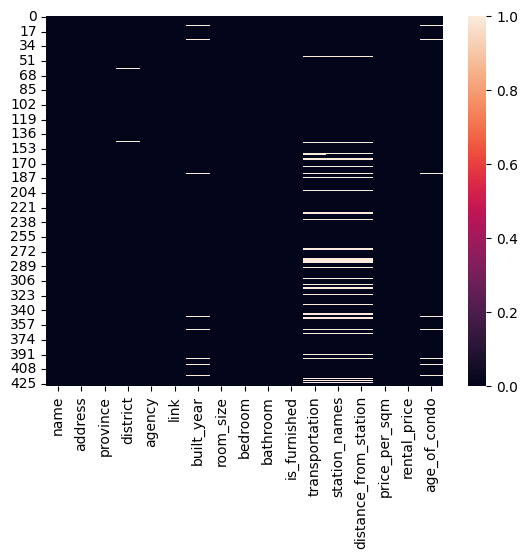

In [11]:
sns.heatmap(df.isna())

In [12]:
df = df[df['district'].notna()]

<Axes: >

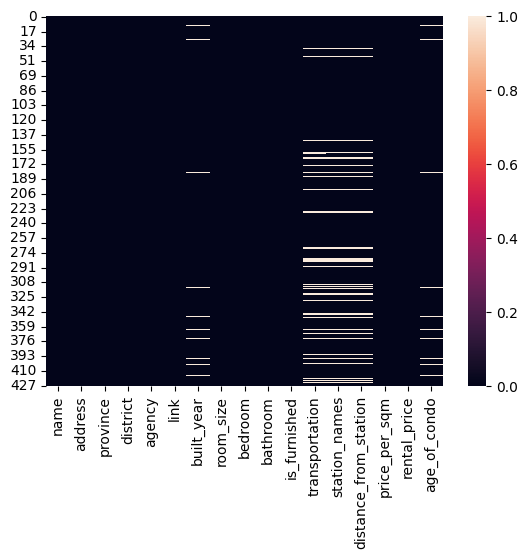

In [13]:
sns.heatmap(df.isna())

## Data Visualizations

### Histogram
I use histogram to show frequency distributions.

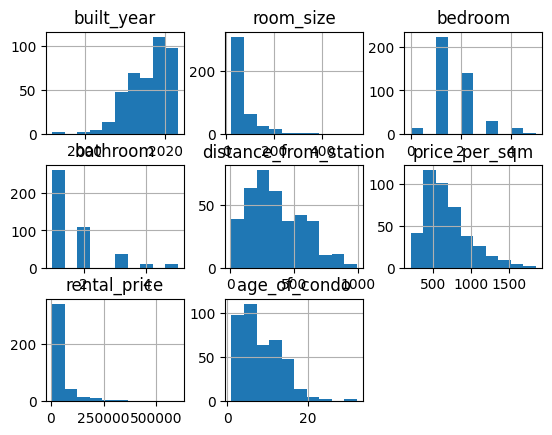

In [14]:
df.hist()
plt.show()

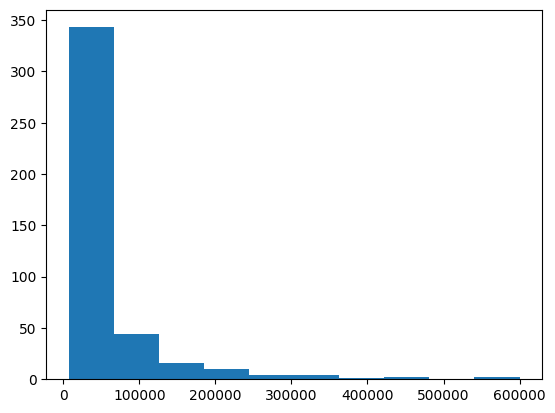

In [15]:
plt.hist(df["rental_price"])
plt.show()

### Countplot
To count how many condos in each distinct and count transportation.

In [16]:
district_counts = df['district'].value_counts()
district_counts

Watthana          87
Khlong Toei       59
Pathum Wan        44
Ratchathewi       36
Chatuchak         34
Bang Rak          32
Sathon            27
Huai Khwang       17
Phra Khanong      13
Khlong San        12
Phaya Thai        11
Din Daeng         11
Bang Na            8
Bang Khae          6
Bang Sue           5
Bang Kapi          5
Bang Kho Laem      4
Thon Buri          3
Bang Khen          3
Yan Nawa           3
Suan Luang         1
Bangkok Noi        1
Phasi Charoen      1
Chom Thong         1
Bang Phlat         1
Wang Thonglang     1
Name: district, dtype: int64

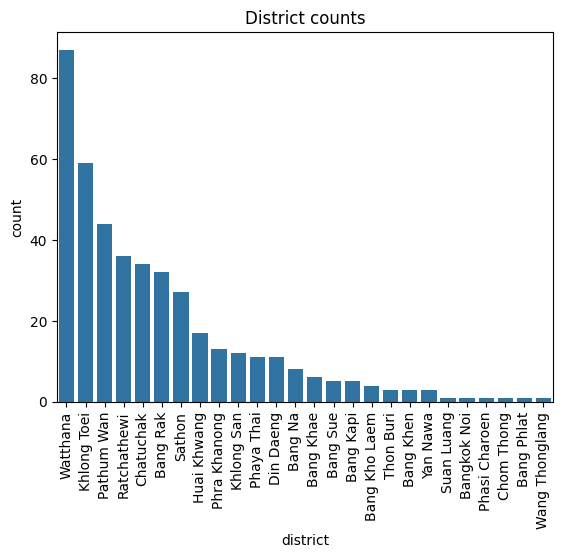

In [17]:
plt.title('District counts')
sns.countplot(x='district', data=df, order=df['district'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

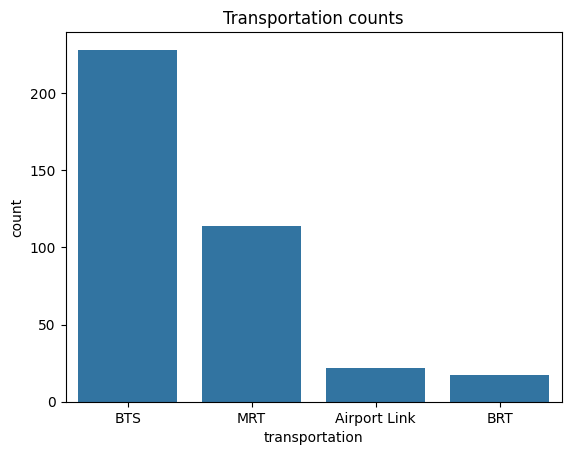

In [18]:
plt.title('Transportation counts')
sns.countplot(x='transportation', data=df, order=df['transportation'].value_counts().index)
plt.show()

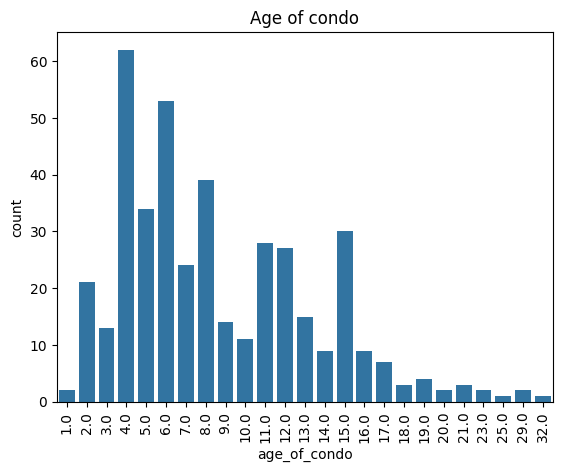

In [19]:
plt.title('Age of condo')
sns.countplot(x='age_of_condo', data=df)
plt.xticks(rotation=90)
plt.show()

### Boxplot
To identify which district have highest price.

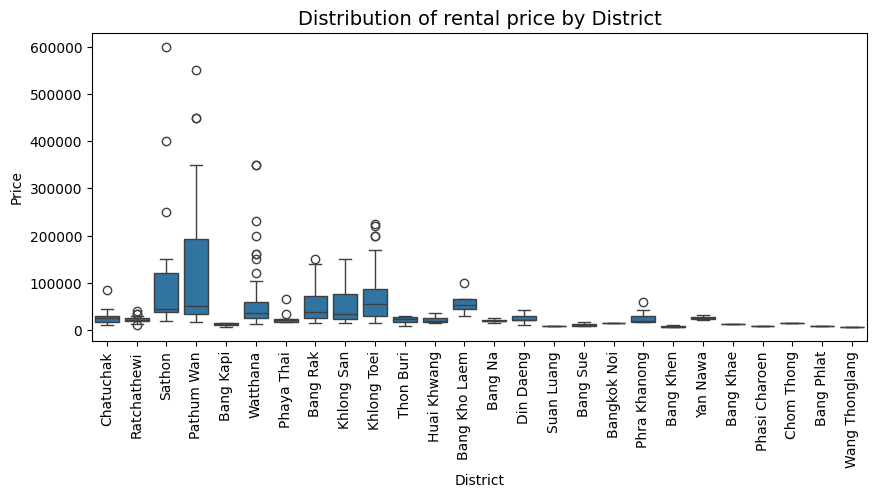

In [20]:
plt.figure(figsize = (10,4))
sns.boxplot(data=df, x='district', y="rental_price")
plt.title("Distribution of rental price by District", fontsize=14)
plt.ylabel("Price", fontsize=10)
plt.xlabel("District", fontsize=10)
plt.xticks(rotation=90)
plt.show()

### Implot
To find correlation and regression in data.
1. Are condos more expensive if have bigger size?
2. Are condos more expensive if have many rooms?
3. Are condos more expensive if nearer to train station?

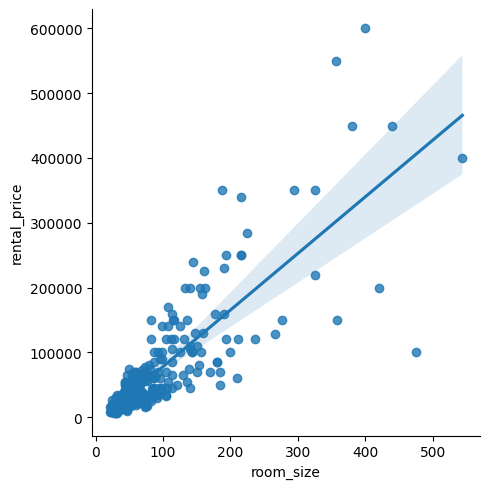

In [21]:
sns.lmplot(x="room_size", y="rental_price", data=df)
plt.show()

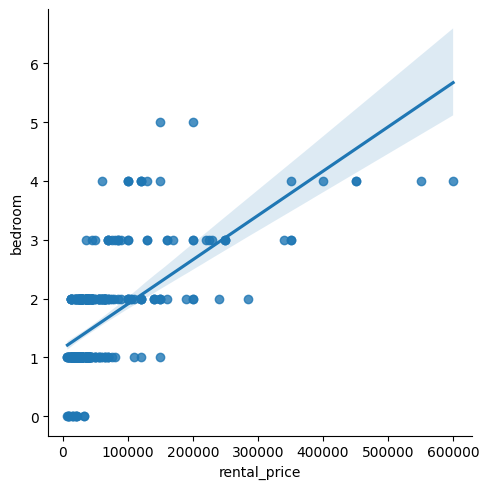

In [22]:
sns.lmplot(data=df, x='rental_price', y='bedroom')
plt.show()

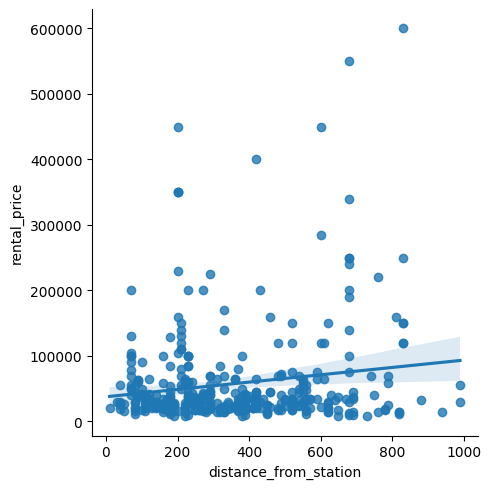

In [23]:
sns.lmplot(data=df, x='distance_from_station', y='rental_price')
plt.show()

### Pie chart
To identify proportions and percentage of Furnished condos and Unfurnished condos.

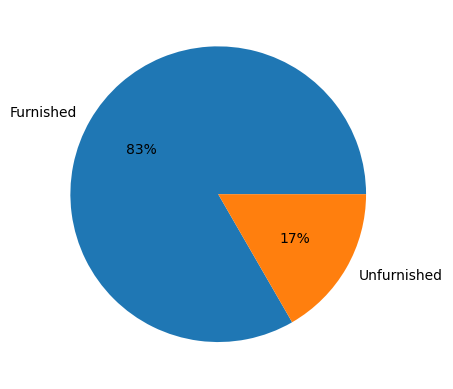

In [24]:
plt.pie(df["is_furnished"].value_counts(), labels=["Furnished", "Unfurnished"], autopct='%1.0f%%')
plt.show()

### Boxplot
To identify rental price of Furnished condos and Unfurnished condos

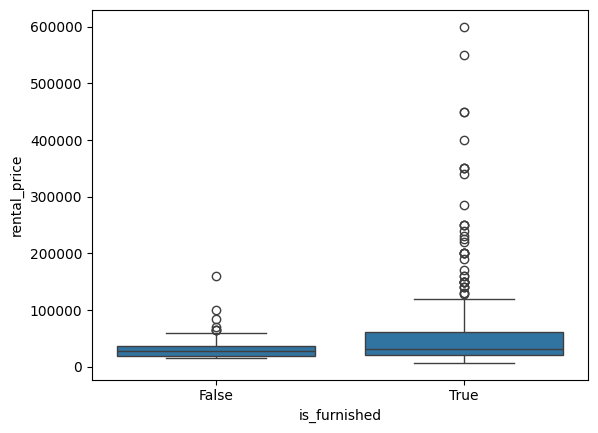

In [25]:
sns.boxplot(x="is_furnished", y="rental_price", data=df)
plt.show()

### Heatmap
To analyze correlation from each variables.

<ipython-input-26-925f89687905>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


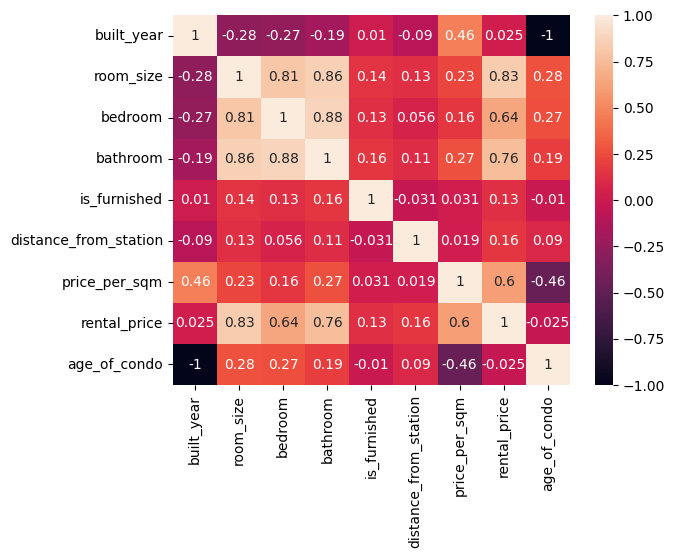

In [26]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Summary
The key findings from the graph above show:
- Distribution of condos: Most condos are located in
  1. Watthana
  2. Khlong Toei
  3. Pathumwan
- Many condos are located near BTS stations
- The average condo age is 4 years old, with the oldest is 32 years old.
- Rental prices in Pathumwan have the widest range of prices.
- Factors affecting rental price:
  - Room size has a strong positive correlation with rental price (R = 0.83).
  - The amount of bedrooms also has a strong positive correlation with rental price (R = 0.64).
  - The distance from a station to a condo has a weak correlation with rental price (R = 0.16).